<a href="https://colab.research.google.com/github/Dastan1996/Dastan1996/blob/main/DS_Stat_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

df = pd.read_csv("bikeshare.csv")
del df['datetime']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [9]:
### YOUR CODE HERE ###
import pandas_datareader as pdr
from datetime import datetime

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


Text(0.5, 1.0, 'Распределение аренды велосипедов по метрикам')

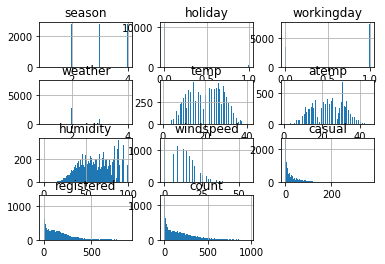

In [52]:
df.hist(bins = 100)
plt.title("Распределение аренды велосипедов по метрикам")

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [124]:
### YOUR CODE HERE ###
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [112]:
# В выборке humidity мы выдим большие выбросы справа, это аномальное распределение 
# в выборке temp бимодальное распределение 
# выборка atemp тоже близка к нормальному распределению

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [125]:
def gamma_params(mean, std):
    shape = round((mean/std)**2, 4)
    scale = round((std**2)/mean, 4)
    return (shape, scale)

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [85]:
### YOUR CODE HERE ###
def my_basic_research(df=df, column = "atemp"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")

Базовые метрики
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64
------------------------------------
Эксцесс  -0.8502363689497141
Ассиметрия  -0.10254538108264065


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


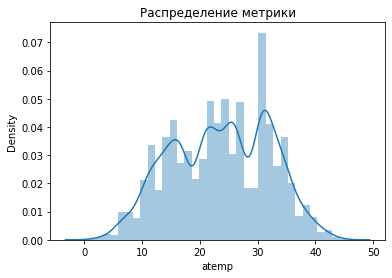

In [86]:
my_basic_research(column = "atemp")

In [88]:
#Наше распределение с натяжкой можно назвать нормальным распределением потому что у нее низкий пик и есть выбросы. Для увереннсти проверим его при помощи QQ plot
#График сравнивает квантили выборки и выбранноого распределения - в нашем случае, нормального.

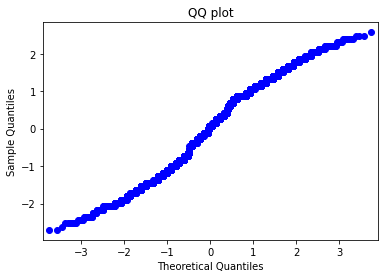

In [87]:
sm.qqplot(df.atemp, fit = True)
plt.title("QQ plot")
plt.show()

In [89]:
#Кажется, что можно использовать стандартные доверительные интервалы для нормального распределения. Для этого воспользуемся функцией

In [74]:
def my_norm_confidence(df=df, column = "atemp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [75]:
confidence = my_norm_confidence()
print(confidence)

(7.045172041640921, 40.26499606418308)


Text(0.5, 1.0, 'Доверительный интервал')

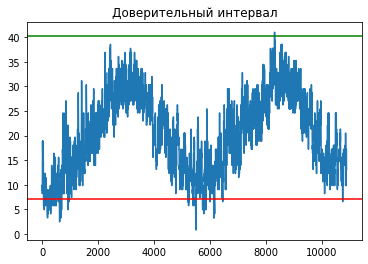

In [76]:
df.temp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [189]:
ns = df.atemp.count()
n_mean = df.atemp.mean()
n_sigma = df.atemp.std()

n1_mean = df.registered.mean()
n1_sigma = df.registered.std()
n2_mean = df.casual.mean()
n2_sigma = df.casual.std()

In [173]:
### YOUR CODE HERE ###
#Нормальное распределение
dfn = np.random.normal(n_mean, n_sigma, ns)
dfn = pd.DataFrame(dfn,columns = ["atemp"])
dfn.atemp = round(dfn.atemp,0)


In [191]:
#Смесь нормальных распределений 
l1 = np.random.normal(n1_mean, n1_sigma, ns)
l2 = np.random.normal(n2_mean, n2_sigma, ns)

dfl1 = pd.DataFrame(l1,columns = ["registered"])
dfl1.registered = round(dfl1.registered,0)

dfl2 = pd.DataFrame(l2,columns = ["casual"])
dfl2.casual = round(dfl2.casual,0)

dfl = dfl1.append(dfl2)

In [160]:
dfn.describe()

,atemp
count,10886.000000
mean,23.624104
std,8.514010
min,-8.000000
25%,18.000000
50%,24.000000
75%,29.000000
max,56.000000


In [148]:
upper_level = dfn.volume.mean() + 3*dfn.volume.std()
lower_level = dfn.volume.mean() - 3*dfn.volume.std()
print(lower_level,upper_level)

-1.6031290292275564 49.033406449767696


In [149]:
level_99 = np.percentile(dfn.volume, 99)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения')

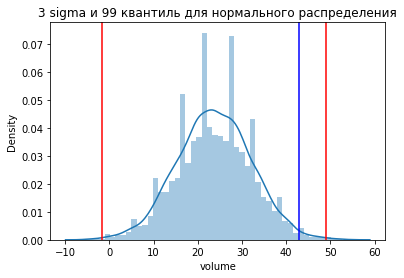

In [150]:
sns.distplot(dfn.volume)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения")

In [ ]:
#правило трех сигм дает далее более жесткий фильтр, чем 99 квантиль.

#Отфильтруем данные свыше трех сигм:

In [163]:
dfn[dfn.atemp >= upper_level].describe()

,atemp
count,19.000000
mean,51.894737
std,2.157538
min,50.000000
25%,50.000000
50%,51.000000
75%,53.000000
max,56.000000


-1.6031290292275564 49.033406449767696
43.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '3 sigma и 99 квантиль для бимодального распределения')

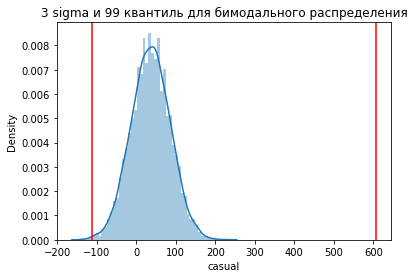

In [195]:
b_upper_level = dfl.registered.mean() + 3*dfl.registered.std()
b_lower_level = dfl.casual.mean() - 3*dfl.casual.std()
print(lower_level,upper_level)

b_level_99 = np.percentile(dfl.casual, 99)
print(level_99)

sns.distplot(dfl.casual)
plt.axvline(x=b_lower_level, color="r", linestyle="-")
plt.axvline(x=b_upper_level, color="r", linestyle="-")
plt.axvline(x=b_level_99, color="b", linestyle="-")
plt.title("3 sigma и 99 квантиль для бимодального распределения")

In [ ]:
#Больше всего аномалий в casual

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [93]:
### YOUR CODE HERE ###

corr_m = df.corr()

In [94]:
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


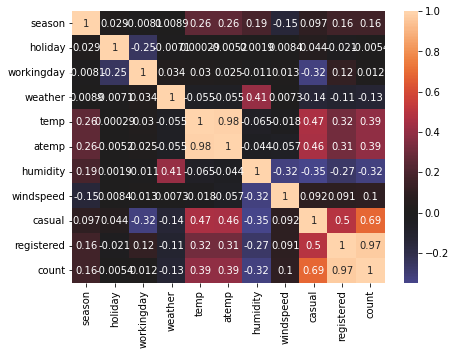

In [95]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

In [101]:
#Из графика видно что есть сильные обратные связи и несколько прямых связей.
# Есть сильная связь регистрацией и количеством
# Так же есть сильная связь между между casual count